посилання на colab -> https://colab.research.google.com/drive/19eajNUhDCwCBetC53JEK5ay6KxwHPm9q?usp=sharing

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
import os

In [2]:
# датасет Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

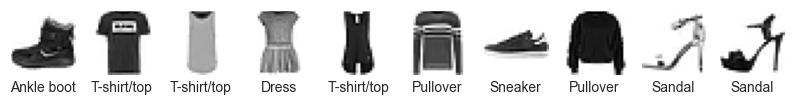

In [4]:
# перші 10 зображень для ознайомлення
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Підготовка даних

In [5]:
# Нормалізація: переводимо значення пікселів з діапазону 0-255 у 0-1
x_train = (x_train / 255.0).astype("float32")
x_test  = (x_test  / 255.0).astype("float32")

In [6]:
# Архітектура моделі
model = models.Sequential([
    keras.Input(shape=(28, 28)),          # Вхідний шар (розмір зображення)
    layers.Flatten(),                     # Перетворення 2D зображення в 1D вектор
    layers.Dense(256, activation='relu'), # Прихований шар
    layers.Dropout(0.3),                  # Регуляризація (викидаємо 30% нейронів)
    layers.Dense(64, activation='relu'),  # Другий прихований шар
    layers.Dropout(0.3),                  # Регуляризація
    layers.Dense(10, activation='softmax')# Вихідний шар (10 класів)
])

# Компіляція моделі
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Налаштування колбеків
cb = [
    # Зупинка навчання, якщо точність не росте 5 епох
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    # зменшення learning rate, якщо loss не падає
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)
]

# Навчання моделі:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1, # 10% даних йде на валідацію
    callbacks=cb,
    verbose=1
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7167 - loss: 0.8329 - val_accuracy: 0.8335 - val_loss: 0.4794 - learning_rate: 3.0000e-04
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8161 - loss: 0.5296 - val_accuracy: 0.8498 - val_loss: 0.4122 - learning_rate: 3.0000e-04
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8390 - loss: 0.4638 - val_accuracy: 0.8563 - val_loss: 0.3927 - learning_rate: 3.0000e-04
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.4279 - val_accuracy: 0.8630 - val_loss: 0.3714 - learning_rate: 3.0000e-04
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.4015 - val_accuracy: 0.8662 - val_loss: 0.3561 - learning_rate: 3.0000e-04
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3882 - val_accuracy: 0.8700 - val_loss: 0.3502 - learning_rate: 3.0000e-04
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

In [7]:
# Перевірка на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc}")

# перевірка умови
if test_acc >= 0.87:
    print("Успіх! Точність >= 0.87")
else:
    print("Увага! Точність нижче 0.87, треба змінити архітектуру.")

# Виведення структури моделі
model.summary()

Test accuracy: 0.8808000087738037
Успіх! Точність >= 0.87


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,176 (2.50 MB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 436,118 (1.66 MB)

In [8]:
# Збереження моделі (Локально)
model.save('fashion_mnist_model.keras')
print("Модель збережено локально як 'fashion_mnist_model.keras'")

Модель збережено локально як 'fashion_mnist_model.keras'


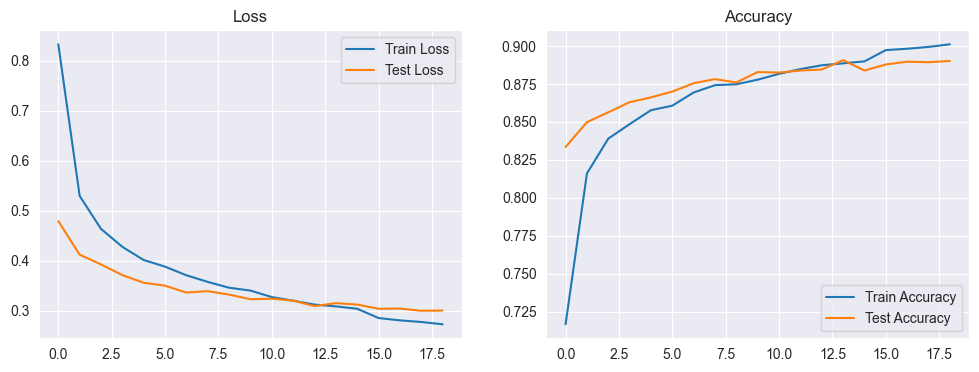

In [9]:
# Графіки результатів
plt.figure(figsize=(12, 4))

# Графік втрат (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

# Графік точності (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.79      0.79      0.79      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.78      0.83      0.80      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.72      0.64      0.68      1000
     Sneaker       0.92      0.97      0.95      1000
         Bag       0.94      0.98      0.96      1000
  Ankle boot       0.97      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



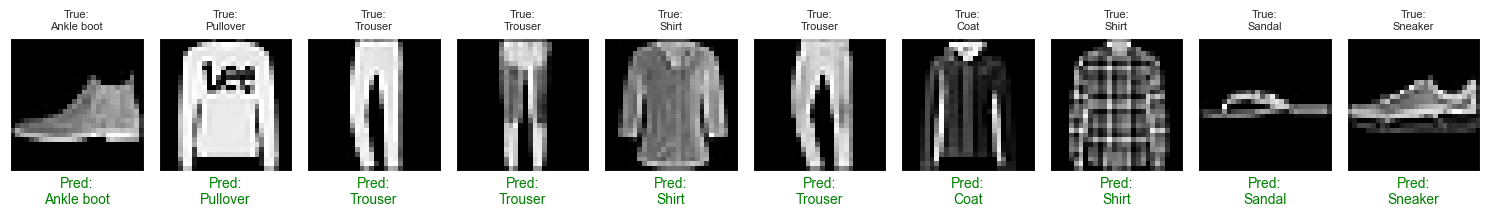

In [10]:
# Детальний звіт та візуалізація прогнозів
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Текстовий звіт (Precision, Recall, F1-score)
print(classification_report(y_test, predicted_labels, target_names=class_names))

# Візуалізація прогнозів (зелений - правильно, червоний - помилка)
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[y_test[i]]
    color = 'green' if predicted_labels[i] == y_test[i] else 'red'
    plt.xlabel(f"Pred:\n{pred_label}", color=color)
    plt.title(f"True:\n{true_label}", fontsize=8)

plt.tight_layout()
plt.show()

In [12]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras_tuner.tuners import RandomSearch
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras

In [13]:
# Повторне завантаження та нормалізація
fashion_mnist = tf.keras.datasets.fashion_mnist

In [14]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
# Функція для побудови моделі (HyperModel)
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape=(28, 28)))
    model.add(Flatten())

    # Тюнінг кількості шарів (від 1 до 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        # Тюнінг кількості нейронів у шарі (від 32 до 512 з кроком 32)
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=32,
                                     max_value=512,
                                     step=32),
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    # Тюнінг learning rate (вибір з трьох варіантів)
    model.compile(optimizer=keras.optimizers.Adam(
                      hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Налаштування тюнера
tuner = RandomSearch(
    build_model,
    objective='val_accuracy', # Ціль - максимізувати точність на валідації
    max_trials=3,             # Кількість спроб різних комбінацій
    executions_per_trial=1,   # Кількість запусків для кожної комбінації
    directory='tuner_logs',   # Папка для логів
    project_name='fashion_mnist_classification'
)

# Колбеки для процесу пошуку
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Запуск пошуку
tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test),
             callbacks=[early_stopping, reduce_lr])

# Отримання та навчання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]
print("\nАрхітектура найкращої моделі:")
best_model.summary()

Trial 3 Complete [00h 01m 23s]
val_accuracy: 0.885200023651123

Best val_accuracy So Far: 0.885200023651123
Total elapsed time: 00h 03m 24s

Архітектура найкращої моделі:


/Users/bohdan.rudnyk/PycharmProjects/VelemML/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 224)            │       175,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,090 (695.66 KB)

 Trainable params: 178,090 (695.66 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Додаткове тренування найкращої моделі
history = best_model.fit(
    x_train, y_train,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Фінальна оцінка
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f'Final Test accuracy: {test_acc}')
print(f'Final Test loss: {test_loss}')

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9026 - loss: 0.3234 - val_accuracy: 0.8865 - val_loss: 0.3717 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9031 - loss: 0.3225 - val_accuracy: 0.8843 - val_loss: 0.3712 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9038 - loss: 0.3192 - val_accuracy: 0.8828 - val_loss: 0.3759 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9052 - loss: 0.3182 - val_accuracy: 0.8826 - val_loss: 0.3799 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9046 - loss: 0.3188 - val_accuracy: 0.8829 - val_loss: 0.3789 - learning_rate: 1.0000e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8843 - loss: 0.3712
Final Test accuracy: 0.8842999935150146
Final Test loss: 0.3711782991886139


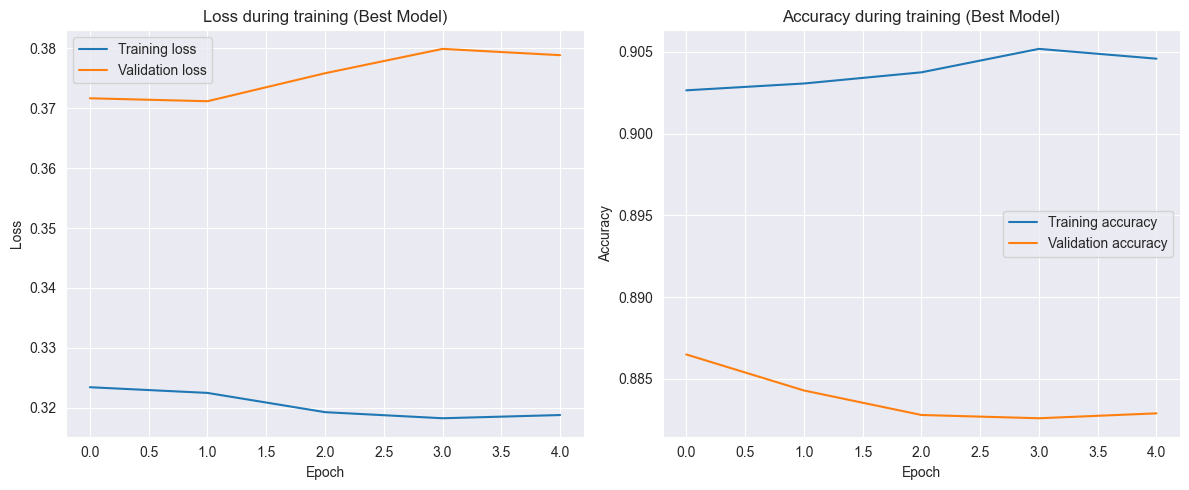

In [17]:
# Графіки для найкращої моделі
plt.figure(figsize=(12, 5))
# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss during training (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy during training (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Висновки <br> У ході роботи ми порівняли ефективність базової нейромережі з фіксованою архітектурою та моделі, оптимізованої за допомогою бібліотеки Keras Tuner. Ручне налаштування забезпечило хороший базовий результат, проте вимагало часу на інтуїтивний підбір параметрів. Автоматичний пошук через RandomSearch дозволив об'єктивно визначити найкращу комбінацію гіперпараметрів (кількість шарів, нейронів та learning rate), що позитивно вплинуло на точність валідації. У підсумку, використання Keras Tuner виявилося більш ефективним (але лише на 0.004) підходом для максимізації продуктивності моделі порівняно з ручним конструюванням. Але з іншого боку навчання зайняло більше часу через пошук по простору гіперпараметрів. Таким чином, для задач, де важлива максимальна точність, доцільно застосовувати автоматичний тюнінг, тоді як для швидких прототипів можна обмежитися базовою моделлю.